In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import os, sys

project_root = '/user_data/mmhender/featsynth/'
# sys.path.append(os.path.join(project_root, 'code'))
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt4, analyze_expt5

import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols


In [5]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt4.get_categ_info()

trial_data_all1, subjects1, cue_level_names, image_type_names = analyze_expt4.load_data()
trial_data_all2, subjects2, cue_level_names, image_type_names = analyze_expt5.load_data()
 
n_subjects1 = len(subjects1)
n_subjects2 = len(subjects2)

n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)
n_kinds = 2;

# expt 1 is color, 2 is grayscale
acc_by_nat1, dprime_by_nat1, rt_by_nat1 = analyze_expt4.get_perf_by_nat()
acc_by_nat2, dprime_by_nat2, rt_by_nat2 = analyze_expt5.get_perf_by_nat()



In [6]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = np.array([-0.2, 0.2])
barwidth = xjitters[1]*2

#### three way anova: naturalness x image type x color 

In [7]:
var1, var2, var3 = 'naturalness','image_type','color_cond'
model_str = 'value ~ C(%s) + C(%s) + C(%s)'%(var1, var2, var3)
model_str += ' + C(%s):C(%s)'%(var1, var2)
model_str += ' + C(%s):C(%s)'%(var1, var3)
model_str += ' + C(%s):C(%s)'%(var2, var3)
model_str += ' + C(%s):C(%s):C(%s)'%(var1, var2, var3)
model_str += ' + 1'
model_str

a_all = []

for cc in [0,1]:
    
    atab = []
    
    for ee, dvals in enumerate([dprime_by_nat1, dprime_by_nat2]):
    
        vals = dvals[:,cc,:,:]
    
        for ii in range(n_image_types):
            for kk in range(n_kinds):
                for ss in range(vals.shape[0]):
    
                    # [cue level, image type, color cond, value]
                    atab.append([kk,ii,ee,vals[ss,ii,kk]])
    
    df = pd.DataFrame(np.array(atab), columns=[var1, var2, var3, 'value'])
    
    model = ols(model_str, data = df).fit()
    
    a = anova_lm(model)

    a_all.append(a)

In [8]:
cc = 0;

print('%s task'%cue_level_names[cc])

a_all[cc]

basic task


,df,sum_sq,mean_sq,F,PR(>F)
C(naturalness),1.0,4.334203,4.334203,9.091775,2.690674e-03
C(image_type),4.0,602.992786,150.748196,316.221629,7.706930e-139
C(color_cond),1.0,34.604329,34.604329,72.588844,1.663110e-16
C(naturalness):C(image_type),4.0,7.750513,1.937628,4.064526,2.960903e-03
C(naturalness):C(color_cond),1.0,3.220194,3.220194,6.754940,9.609265e-03
C(image_type):C(color_cond),4.0,1.130614,0.282654,0.592917,6.679038e-01
C(naturalness):C(image_type):C(color_cond),4.0,0.695393,0.173848,0.364678,8.337986e-01
Residual,530.0,252.659960,0.476717,NaN,NaN


In [9]:
cc = 1;

print('%s task'%cue_level_names[cc])

a_all[cc]

super task


,df,sum_sq,mean_sq,F,PR(>F)
C(naturalness),1.0,7.950997,7.950997,14.709415,1.405063e-04
C(image_type),4.0,430.394256,107.598564,199.058305,4.397633e-104
C(color_cond),1.0,45.744060,45.744060,84.626919,8.245472e-19
C(naturalness):C(image_type),4.0,5.042667,1.260667,2.332245,5.480126e-02
C(naturalness):C(color_cond),1.0,3.241861,3.241861,5.997472,1.464921e-02
C(image_type):C(color_cond),4.0,7.158522,1.789631,3.310832,1.077312e-02
C(naturalness):C(image_type):C(color_cond),4.0,2.648527,0.662132,1.224949,2.991456e-01
Residual,530.0,286.485103,0.540538,NaN,NaN


#### three-way anova: cue level x image type x naturalness

In [10]:
var1, var2, var3 = 'cond','image_type','naturalness'
model_str = 'value ~ C(%s) + C(%s) + C(%s)'%(var1, var2, var3)
model_str += ' + C(%s):C(%s)'%(var1, var2)
model_str += ' + C(%s):C(%s)'%(var1, var3)
model_str += ' + C(%s):C(%s)'%(var2, var3)
model_str += ' + C(%s):C(%s):C(%s)'%(var1, var2, var3)
model_str += ' + 1'
model_str

a = []

for ee, [ename, dvals] in enumerate(zip(['color expt','grayscale expt'], \
                                           [dprime_by_nat1, dprime_by_nat2])):

    atab = []

    vals = dvals

    for cc in range(n_cue_levels):
        for ii in range(n_image_types):
            for kk in range(n_kinds):
                for ss in range(vals.shape[0]):

                    # [cue level, image type, color cond, value]
                    atab.append([cc,ii,kk,vals[ss,cc,ii,kk]])

    df = pd.DataFrame(np.array(atab), columns=[var1, var2, var3,'value'])

    model = ols(model_str, data = df).fit()

    a+= [anova_lm(model)]

In [11]:
print('color')
a[0]

color


,df,sum_sq,mean_sq,F,PR(>F)
C(cond),1.0,9.362095,9.362095,18.183762,2.367935e-05
C(image_type),4.0,462.561588,115.640397,224.605449,2.221017e-113
C(naturalness),1.0,18.097198,18.097198,35.149735,5.449975e-09
C(cond):C(image_type),4.0,12.998037,3.249509,6.311441,5.729984e-05
C(cond):C(naturalness),1.0,0.140822,0.140822,0.273516,6.011977e-01
C(image_type):C(naturalness),4.0,6.998474,1.749619,3.398240,9.276108e-03
C(cond):C(image_type):C(naturalness),4.0,3.050617,0.762654,1.481284,2.064519e-01
Residual,540.0,278.024486,0.514860,NaN,NaN


In [12]:
print('grayscale')
a[1]

grayscale


,df,sum_sq,mean_sq,F,PR(>F)
C(cond),1.0,4.543839,4.543839,9.048679,2.756164e-03
C(image_type),4.0,561.995945,140.498986,279.792093,4.077810e-128
C(naturalness),1.0,0.377807,0.377807,0.752371,3.861266e-01
C(cond):C(image_type),4.0,4.120608,1.030152,2.051463,8.597968e-02
C(cond):C(naturalness),1.0,0.131427,0.131427,0.261725,6.091546e-01
C(image_type):C(naturalness),4.0,5.439332,1.359833,2.707995,2.963102e-02
C(cond):C(image_type):C(naturalness),4.0,0.648676,0.162169,0.322946,8.626194e-01
Residual,520.0,261.120577,0.502155,NaN,NaN


#### paired t-tests for effect of natural vs artificial

In [13]:
n_color_conds = 2;
tvals = np.zeros((n_image_types, n_cue_levels, n_color_conds))
pvals = np.zeros((n_image_types, n_cue_levels, n_color_conds))

for ee, dvals in enumerate([dprime_by_nat1, dprime_by_nat2]):

    print('Experiment %d'%(ee+1))
    
    df = pd.DataFrame(index=image_type_names)

    for cc, cue in enumerate(cue_level_names):
        
        for ii in range(n_image_types):
            
            p, t = stats_utils.paired_ttest_nonpar(dvals[:,cc,ii,0], dvals[:,cc,ii,1])
            
            tvals[ii,cc,ee] = t
            pvals[ii,cc,ee] = p

        
    _, pvals_fdr = stats_utils.fdr_keepshape(pvals[:,:,ee], alpha=0.01, method='poscorr')
    
    for cc, cue in enumerate(cue_level_names):

        df['%s: t'%cue_level_names[cc]] = tvals[:,cc,ee].round(4)

        df['%s: p'%cue_level_names[cc]] = pvals_fdr[:,cc].round(4)

    print(df)

Experiment 1
       basic: t  basic: p  super: t  super: p
pool1   -2.8174    0.0067   -4.0887    0.0000
pool2   -2.7823    0.0200   -3.8711    0.0000
pool3   -4.0966    0.0100   -2.6048    0.0267
pool4   -1.2424    0.2911   -0.1081    0.8860
orig     1.0940    0.2911   -1.4396    0.2514
Experiment 2
       basic: t  basic: p  super: t  super: p
pool1   -2.4398    0.1200   -2.9944    0.0800
pool2   -0.5350    0.7825    0.3149    0.8267
pool3   -1.4551    0.4400   -0.8835    0.5229
pool4    0.8932    0.5229   -0.0294    0.9480
orig     1.3251    0.4850    0.9757    0.5229


#### plot d-prime, all conds

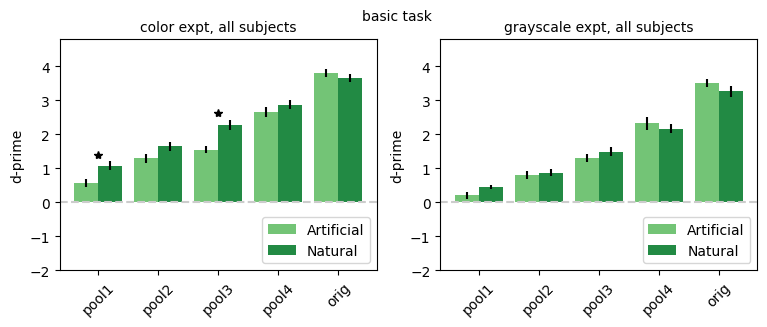

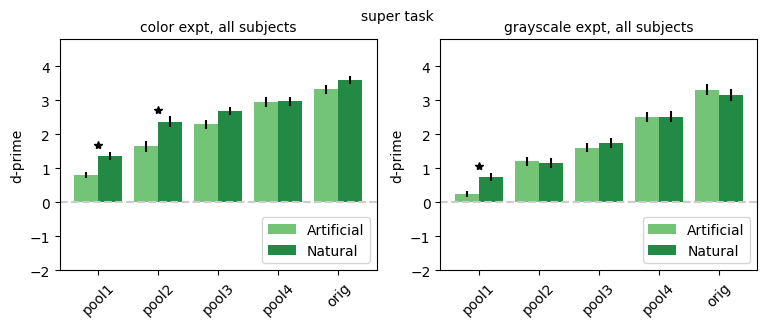

In [17]:
plot_utils.set_all_font_sizes(10)

nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]
n_kinds = 2
kind_names = ['Artificial','Natural']



for cc in [0,1]:
    
    plt.figure(figsize=(9,3))

    for ee, [ename, dvals] in enumerate(zip(['color expt','grayscale expt'], \
                                               [dprime_by_nat1, dprime_by_nat2])):



        ax = plt.subplot(1,2,ee+1)

#         subjects_plot = (svals==cbi) 
        # n_subs_plot = np.sum(subjects_plot)
        vals = dvals[:,cc,:,:]
        n_subs_plot = vals.shape[0]
        
        plot_vals = vals;
        meanvals = np.mean(plot_vals, axis=0)
        semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

        lh = []

        for kk in range(n_kinds):

#                 for si in range(n_subs_plot):

#                     h = plt.plot(np.arange(n_image_types)+xjitters[kk], \
#                                  plot_vals[si,:,kk],\
#                                  point_types[kk],color=[0.8, 0.8, 0.8], markerfacecolor='none', 
#                                 markersize=markersize)
                # lh.append(h[0])

            h = plt.bar(np.arange(n_image_types)+xjitters[kk], \
                             meanvals[:,kk], color=nat_colors[kk,:], width=barwidth)

            plt.errorbar(np.arange(n_image_types)+xjitters[kk], \
                             meanvals[:,kk], \
                             semvals[:,kk], \
                            color = 'k', linestyle='none')
            lh.append(h)

        for ii in range(n_image_types):
            if pvals[ii,cc,ee]<0.01:
                height = np.max(meanvals[ii,:]+semvals[ii,:])+0.20
                plt.plot(ii, height, '*', color='k')
    

        plt.title('%s, all subjects'%(ename))

        plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


        plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

        ax.legend(lh, kind_names, loc='lower right')

        plt.ylabel('d-prime')

        plt.ylim([-2, 4.8])

    plt.suptitle('%s task'%(cue_level_names[cc]))

#### RT: paired t-tests for effect of natural vs artificial

In [18]:
n_color_conds = 2;
tvals = np.zeros((n_image_types, n_cue_levels, n_color_conds))
pvals = np.zeros((n_image_types, n_cue_levels, n_color_conds))

for ee, dvals in enumerate([rt_by_nat1, rt_by_nat2]):

    print('Experiment %d'%(ee+1))
    
    df = pd.DataFrame(index=image_type_names)

    for cc, cue in enumerate(cue_level_names):
        
        for ii in range(n_image_types):
            
            p, t = stats_utils.paired_ttest_nonpar(dvals[:,cc,ii,0], dvals[:,cc,ii,1])
            
            tvals[ii,cc,ee] = t
            pvals[ii,cc,ee] = p

        
    _, pvals_fdr = stats_utils.fdr_keepshape(pvals[:,:,ee], alpha=0.01, method='poscorr')
    
    for cc, cue in enumerate(cue_level_names):

        df['%s: t'%cue_level_names[cc]] = tvals[:,cc,ee].round(4)

        df['%s: p'%cue_level_names[cc]] = pvals_fdr[:,cc].round(4)

    print(df)

Experiment 1
       basic: t  basic: p  super: t  super: p
pool1    3.6185    0.0025    5.2906    0.0000
pool2    4.1491    0.0000    2.9007    0.0089
pool3    4.5750    0.0000    4.6267    0.0000
pool4    4.3036    0.0000    5.2200    0.0000
orig     0.7980    0.3920    5.3677    0.0000
Experiment 2
       basic: t  basic: p  super: t  super: p
pool1    0.1971     0.854    2.5268    0.0533
pool2    1.6508     0.192    3.1962    0.0100
pool3    3.2872     0.010    1.4147    0.2733
pool4    0.1927     0.854    0.3881    0.8540
orig    -0.3843     0.854    1.9655    0.1450


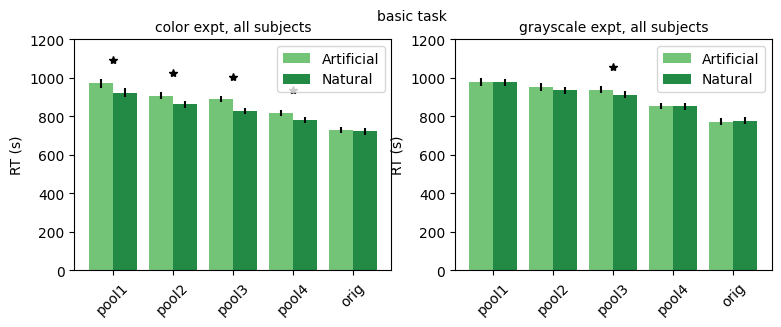

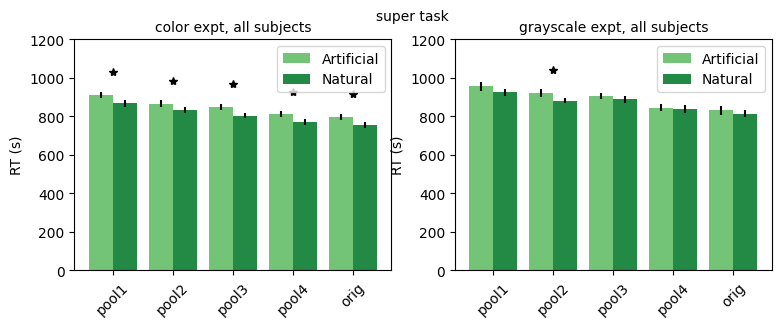

In [19]:
plot_utils.set_all_font_sizes(10)

nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]
n_kinds = 2
kind_names = ['Artificial','Natural']



for cc in [0,1]:
    
    plt.figure(figsize=(9,3))

    for ee, [ename, rtvals] in enumerate(zip(['color expt','grayscale expt'], \
                                               [rt_by_nat1, rt_by_nat2])):



        ax = plt.subplot(1,2,ee+1)

#         subjects_plot = (svals==cbi) 
        # n_subs_plot = np.sum(subjects_plot)
        vals = rtvals[:,cc,:,:]
        n_subs_plot = vals.shape[0]
        
        plot_vals = vals;
        meanvals = np.mean(plot_vals, axis=0)
        semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

        lh = []

        for kk in range(n_kinds):

#                 for si in range(n_subs_plot):

#                     h = plt.plot(np.arange(n_image_types)+xjitters[kk], \
#                                  plot_vals[si,:,kk],\
#                                  point_types[kk],color=[0.8, 0.8, 0.8], markerfacecolor='none', 
#                                 markersize=markersize)
                # lh.append(h[0])

            h = plt.bar(np.arange(n_image_types)+xjitters[kk], \
                             meanvals[:,kk], color=nat_colors[kk,:], width=barwidth)

            plt.errorbar(np.arange(n_image_types)+xjitters[kk], \
                             meanvals[:,kk], \
                             semvals[:,kk], \
                            color = 'k', linestyle='none')
            lh.append(h)

        for ii in range(n_image_types):
            if pvals[ii,cc,ee]<0.01:
                height = np.max(meanvals[ii,:]+semvals[ii,:])+100
                plt.plot(ii, height, '*', color='k')
    

        plt.title('%s, all subjects'%(ename))

        plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


        # plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

        ax.legend(lh, kind_names, loc='upper right')

        plt.ylabel('RT (s)')

        plt.ylim([0, 1200])

    plt.suptitle('%s task'%(cue_level_names[cc]))

#### group trials according to whether the cue was natural/artifical
irrespective of actual viewed image


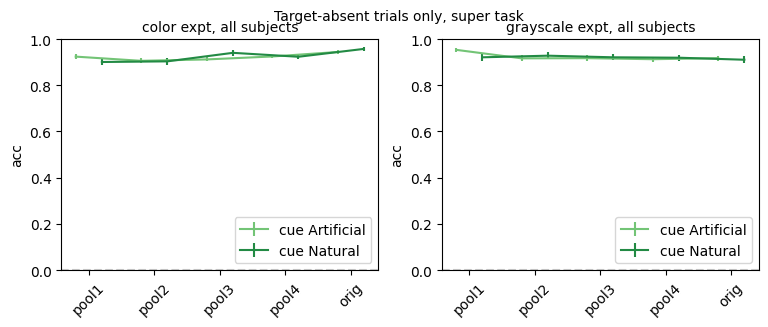

In [13]:
acc_by_cued_nat1, dprime_by_cued_nat1, propyes_by_cued_nat1, acc_absent_by_cued1 = analyze_expt1.get_perf_by_cued_nat()
acc_by_cued_nat2, dprime_by_cued_nat2, propyes_by_cued_nat2, acc_absent_by_cued2 = analyze_expt2.get_perf_by_cued_nat()


plot_utils.set_all_font_sizes(10)

nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]
n_kinds = 2
kind_names = ['Artificial','Natural']

for cc in [1]:
    
    plt.figure(figsize=(9,3))

    for ee, [ename, avals, svals] in enumerate(zip(['color expt','grayscale expt'], \
                                               [acc_absent_by_cued1, acc_absent_by_cued2], \
                                               [subject_cb1, subject_cb2])):



        ax = plt.subplot(1,2,ee+1)

#         subjects_plot = (svals==cbi) 
        # n_subs_plot = np.sum(subjects_plot)
        vals = avals[:,cc,:,:]
        n_subs_plot = vals.shape[0]
        
        plot_vals = vals;
        meanvals = np.mean(plot_vals, axis=0)
        semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

        lh = []

        for kk in range(n_kinds):

#                 for si in range(n_subs_plot):

#                     h = plt.plot(np.arange(n_image_types)+xjitters[kk], \
#                                  plot_vals[si,:,kk],\
#                                  point_types[kk],color=[0.8, 0.8, 0.8], markerfacecolor='none', 
#                                 markersize=markersize)
                # lh.append(h[0])

            h = plt.errorbar(np.arange(n_image_types)+xjitters[kk], \
                             meanvals[:,kk], \
                             semvals[:,kk], \
                            color = nat_colors[kk,:])
            lh.append(h)

        plt.title('%s, all subjects'%(ename))

        plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


        plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

        ax.legend(lh, ['cue %s'%kk for kk in kind_names], loc='lower right')

        plt.ylabel('acc')

        plt.ylim([0,1])

    plt.suptitle('Target-absent trials only, %s task'%(cue_level_names[cc]))